# Model Health Monitoring

This example assumes you've read `advanced.py`, and covers:

  - Exploding & vanishing gradients monitoring
  - Spotting dead weights

In [1]:
import deeptrain
deeptrain.util.misc.append_examples_dir_to_sys_path()  # for `from utils import`

from utils import CL_CONFIGS as C
from utils import init_session, make_classifier
from utils import Adam
from see_rnn import rnn_histogram, rnn_heatmap

## Case 1: Large weights
We train with a large learning rate to force large weights

In [2]:
# We build a model prone to large but not exploding/vanishing gradients
C['model']['optimizer'] = Adam(6)
C['traingen']['epochs'] = 1
tg = init_session(C, make_classifier)

Discovered 48 files with matching format
Discovered dataset with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Discovered 36 files with matching format
Discovered dataset with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Preloading superbatch ... Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... Discovered 36 files with matching format
.................................... finished, w/ 4608 total samples
Val initial data prepared
Logging ON; directory (new): C:\deeptrain\examples\dir\logs\M2__model-Adam__min999.000



Fitting set 1...   (Loss, Acc) = (2.301934, 0.164062) 
Fitting set 2...   (Loss, Acc) = (61413017.150967, 0.105469) 
Fitting set 3...   (Loss, Acc) = (50551152.767311, 0.101562) 
Fitting set 4...   (Loss, Acc) = (39892719.075484, 0.113281) 
Fitting set 5...   (Loss, Acc) = (31946056.266637, 0.115625) 
Fitting set 6...   (Loss, Acc) = (26621893.911712, 0.117188) 
Fitting set 7...   (Loss, Acc) = (22818785.382816, 0.119420) 
Fitting set 8...   (Loss, Acc) = (19966440.713710, 0.116211) 
Fitting set 9...   (Loss, Acc) = (17747949.665580, 0.114583) 
Fitting set 10...  (Loss, Acc) = (15973156.238238, 0.112500) 
Fitting set 11...  (Loss, Acc) = (14521056.922195, 0.113636) 
Fitting set 12...  (Loss, Acc) = (13310969.448344, 0.112630) 
Fitting set 13...  (Loss, Acc) = (12287049.257492, 0.109976) 
Fitting set 14...  (Loss, Acc) = (11409403.477279, 0.105469) 
Fitting set 15...  (Loss, Acc) = (10648777.200421, 0.105729) 
Fitting set 16...  (Loss, Acc) = (9983229.190327, 0.105469) 
Fitting set 17.

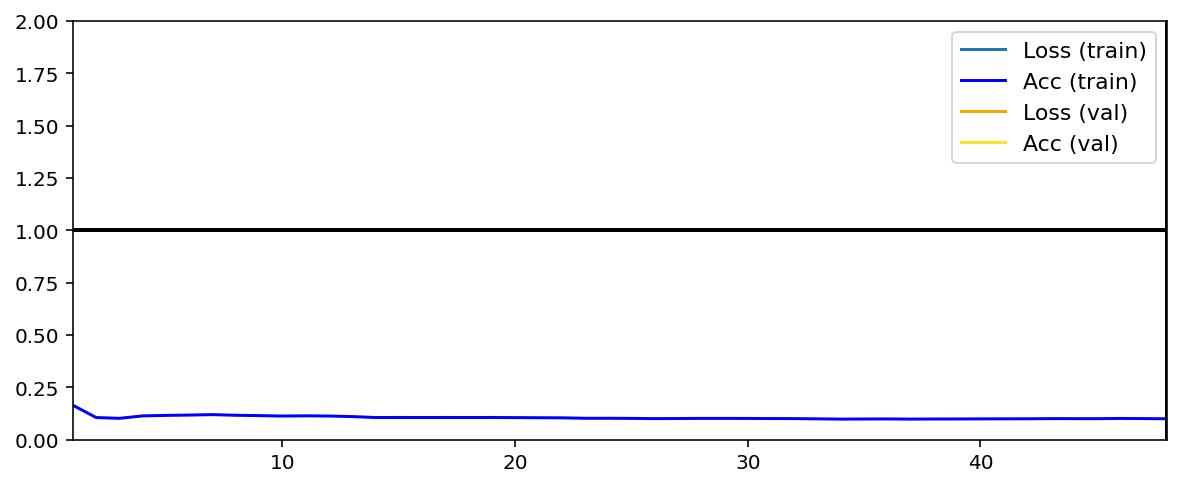


100.0% Large -- 'conv2d/kernel:0'
100.0% Large -- 'conv2d/bias:0'
100.0% Large -- 'conv2d_1/kernel:0'
100.0% Large -- 'conv2d_1/bias:0'
85.8% Large -- 'dense/kernel:0'
100.0% Large -- 'dense/bias:0'
99.7% Large -- 'dense_1/kernel:0'
100.0% Large -- 'dense_1/bias:0'
L = layer index, W = weight tensor indexTraining has concluded.


In [3]:
tg.train()

## Case 2: Exploding/vanishing weights
We build RNNs with ReLU activations to generate extreme activations, thereby gradients and weights

In [4]:
from utils import TS_CONFIGS as C
from utils import make_timeseries_classifier

C['model']['activation'] = 'relu'
C['model']['optimizer'] = Adam(.3)
C['traingen']['epochs'] = 1
C['traingen']['eval_fn'] = 'predict'
C['traingen']['val_freq'] = {'epoch': 1}
tg = init_session(C, make_timeseries_classifier)

Discovered dataset with matching format
Discovered dataset with matching format
103 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Discovered dataset with matching format
Discovered dataset with matching format
12 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Preloading superbatch ... Discovered dataset with matching format
....................................................................................................... finished, w/ 13184 total samples
Train initial data prepared
Preloading superbatch ... Discovered dataset with matching format
............ finished, w/ 1536 total samples
Val initial data prepared
Logging ON; directory (new): C:\deeptrain\examples\dir\logs\M3__model-Adam__min999.000



Fitting set 0...   Loss = nan RNNs reset 
Fitting set 1...   Loss = nan RNNs reset 
Fitting set 10...  Loss = nan RNNs reset 
Fitting set 100... Loss = nan RNNs reset 
Fitting set 101... Loss = nan RNNs reset 
Fitting set 102... Loss = nan RNNs reset 
Fitting set 11...  Loss = nan RNNs reset 
Fitting set 12...  Loss = nan RNNs reset 
Fitting set 13...  Loss = nan RNNs reset 
Fitting set 14...  Loss = nan RNNs reset 
Fitting set 15...  Loss = nan RNNs reset 
Fitting set 16...  Loss = nan RNNs reset 
Fitting set 17...  Loss = nan RNNs reset 
Fitting set 18...  Loss = nan RNNs reset 
Fitting set 19...  Loss = nan RNNs reset 
Fitting set 2...   Loss = nan RNNs reset 
Fitting set 20...  Loss = nan RNNs reset 
Fitting set 21...  Loss = nan RNNs reset 
Fitting set 22...  Loss = nan RNNs reset 
Fitting set 23...  Loss = nan RNNs reset 
Fitting set 24...  Loss = nan RNNs reset 
Fitting set 25...  Loss = nan RNNs reset 
Fitting set 26...  Loss = nan RNNs reset 
Fitting set 27...  Loss = nan RNN

C:\deeptrain\deeptrain\metrics.py:113: RuntimeWarning: invalid value encountered in greater_equal
  neg_abs_logits = np.where(logits >= 0, -logits, logits)
C:\deeptrain\deeptrain\metrics.py:114: RuntimeWarning: invalid value encountered in greater_equal
  relu_logits    = np.where(logits >= 0, logits, 0)
C:\deeptrain\deeptrain\util\searching.py:70: RuntimeWarning: invalid value encountered in greater
  new_best = (metric > best_metric if max_is_best else


 Loss = nan 
RNNs reset Validating set 11... Loss = nan 
RNNs reset Validating set 2...  Loss = nan 
RNNs reset Validating set 3...  Loss = nan 
RNNs reset Validating set 4...  Loss = nan 
RNNs reset Validating set 5...  Loss = nan 
RNNs reset Validating set 6...  Loss = nan 
RNNs reset Validating set 7...  Loss = nan 
RNNs reset Validating set 8...  Loss = nan 
RNNs reset Validating set 9...  Loss = nan 
RNNs reset 

D:\Anaconda\envs\tf2_env\lib\site-packages\matplotlib\axes\_axes.py:6630: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
D:\Anaconda\envs\tf2_env\lib\site-packages\matplotlib\axes\_axes.py:6630: RuntimeWarning: invalid value encountered in less
  xmin = min(xmin, np.nanmin(xi))
D:\Anaconda\envs\tf2_env\lib\site-packages\matplotlib\axes\_axes.py:6631: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
D:\Anaconda\envs\tf2_env\lib\site-packages\matplotlib\axes\_axes.py:6631: RuntimeWarning: invalid value encountered in greater
  xmax = max(xmax, np.nanmax(xi))


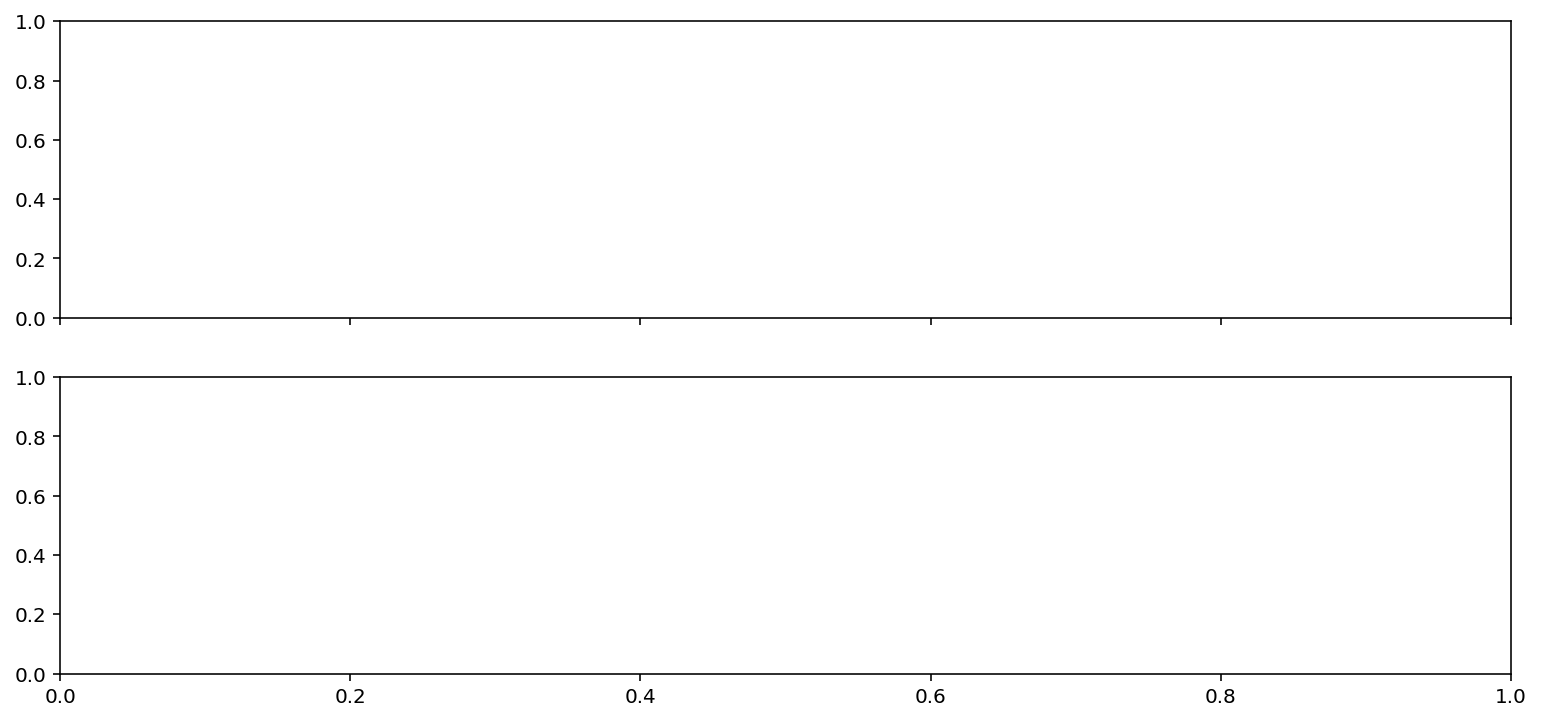

In [5]:
# will error due to being unable to plot nan metrics; we don't mind
try: tg.train()
except: pass

In [6]:
tg.check_health()

3.125% dead -- 'lstm/lstm_cell/bias:0'
1.042% dead -- 'lstm_1/lstm_cell_1/bias:0'
L = layer index, W = weight tensor index

82.3% NaN -- 'lstm/lstm_cell/kernel:0'
100.0% NaN -- 'lstm/lstm_cell/recurrent_kernel:0'
82.3% NaN -- 'lstm/lstm_cell/bias:0'
100.0% NaN -- 'lstm_1/lstm_cell_1/kernel:0'
100.0% NaN -- 'lstm_1/lstm_cell_1/recurrent_kernel:0'
77.1% NaN -- 'lstm_1/lstm_cell_1/bias:0'
100.0% NaN -- 'dense_2/kernel:0'
100.0% NaN -- 'dense_2/bias:0'
L = layer index, W = weight tensor index

C:\deeptrain\deeptrain\introspection.py:405: RuntimeWarning: invalid value encountered in less
  num_dead = np.sum(np.abs(w_value) < dead_threshold)
C:\deeptrain\deeptrain\introspection.py:490: RuntimeWarning: invalid value encountered in greater
  num_large = np.sum(np.abs(w_value) > large_threshold) - num_nan


### Visualize

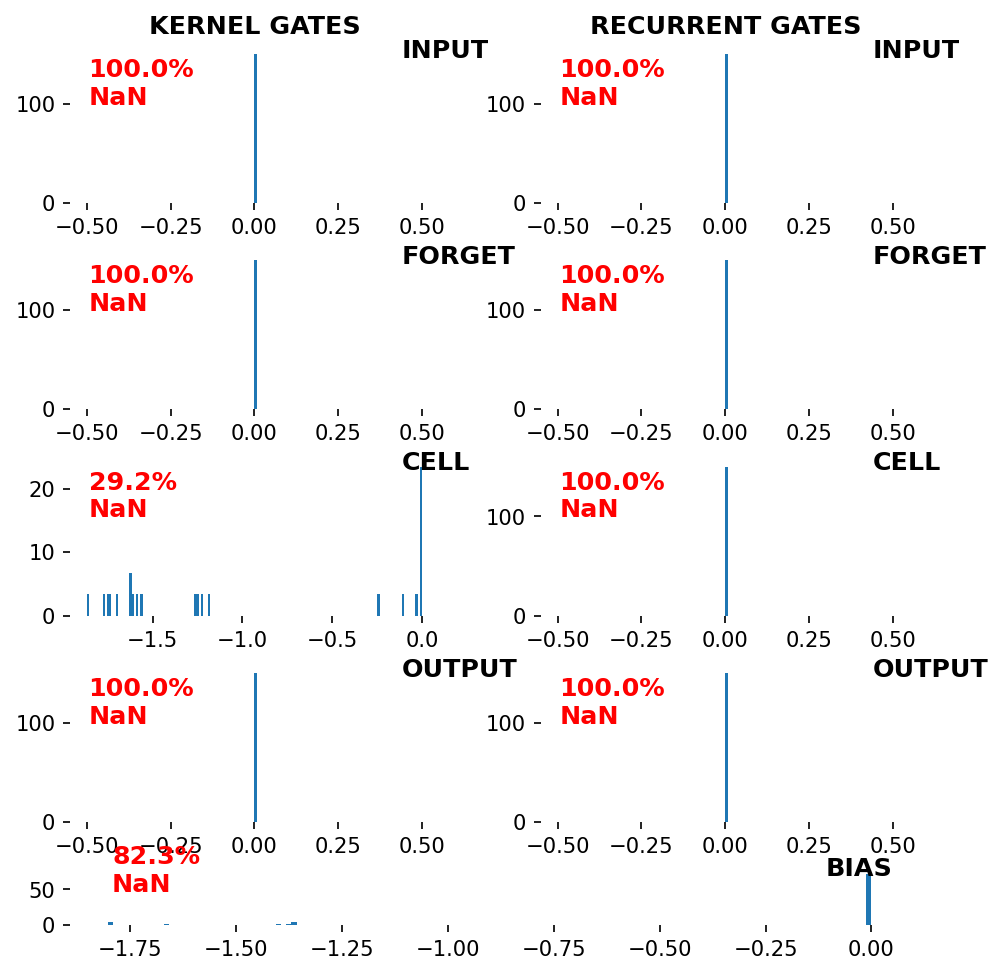


KERNEL:
INPUT: 100.0% NaN
FORGET: 100.0% NaN
CELL: 29.2% NaN
OUTPUT: 100.0% NaN

RECURRENT:
INPUT: 100.0% NaN
FORGET: 100.0% NaN
CELL: 100.0% NaN
OUTPUT: 100.0% NaN


D:\Anaconda\envs\tf2_env\lib\site-packages\matplotlib\colors.py:581: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


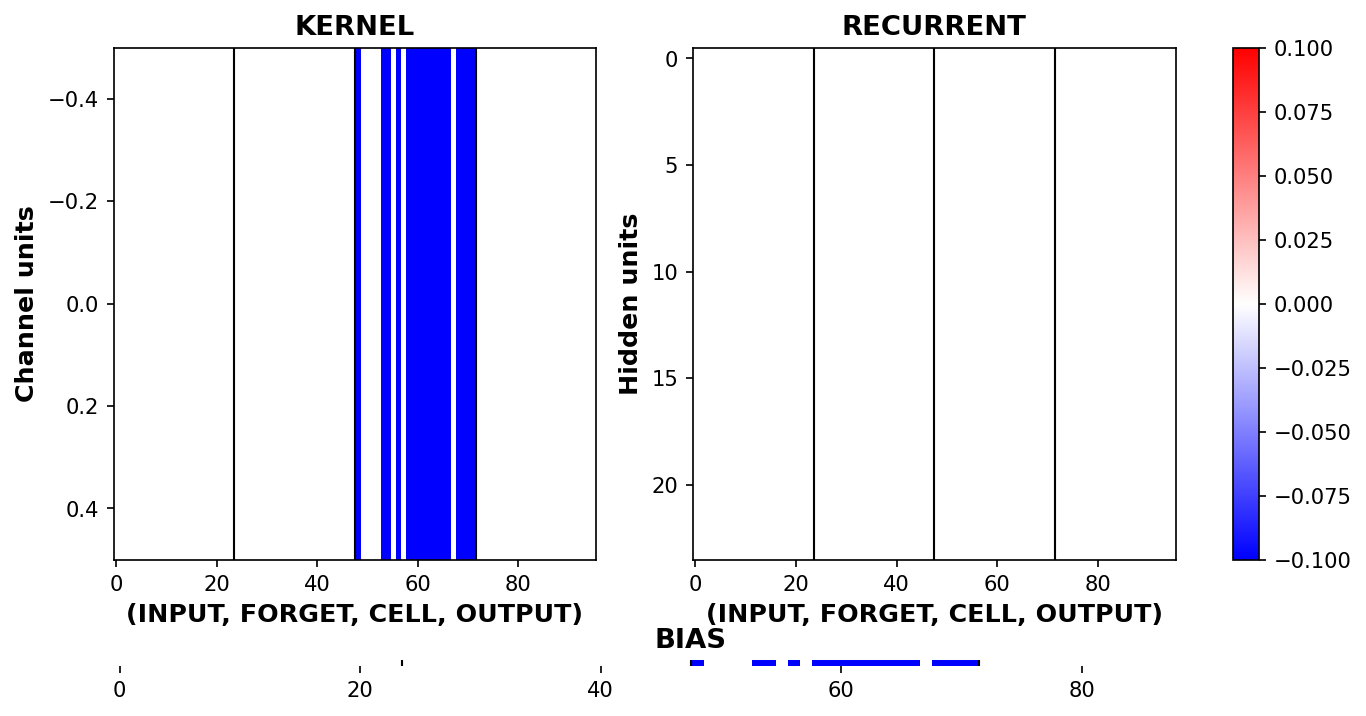

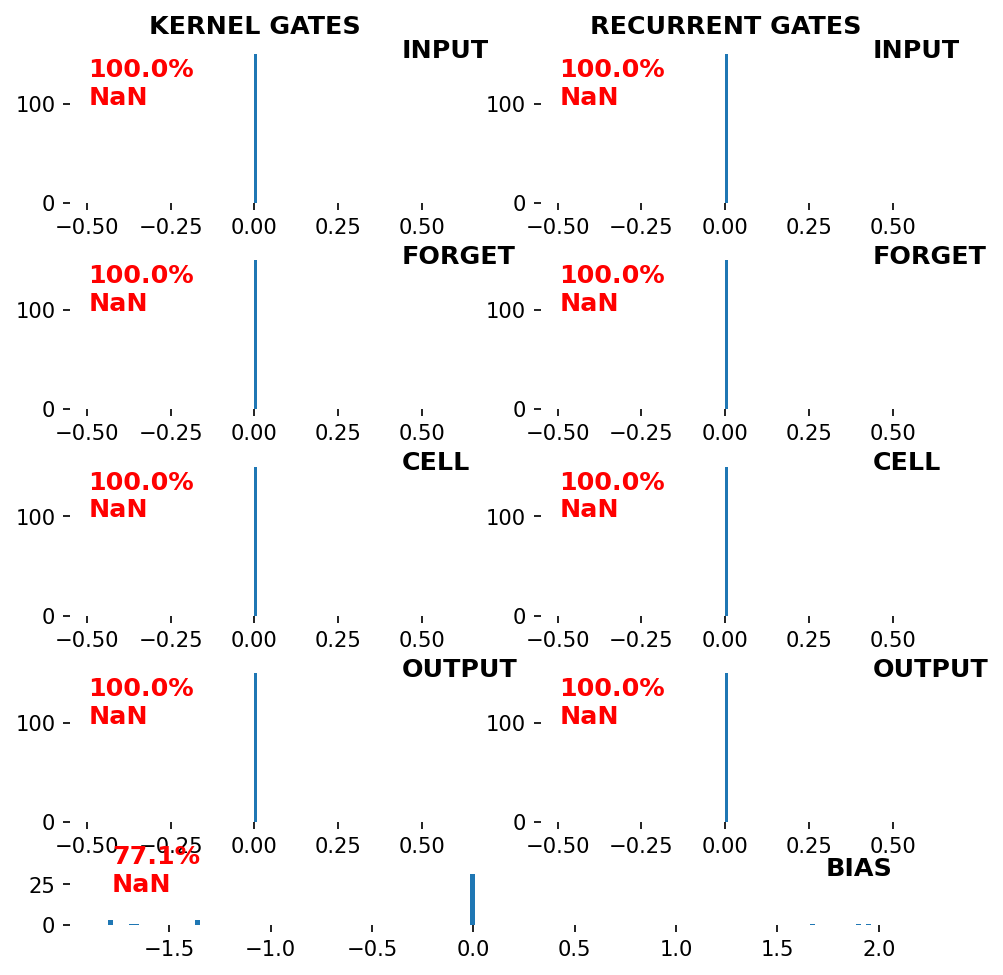


KERNEL:
INPUT: 100.0% NaN
FORGET: 100.0% NaN
CELL: 100.0% NaN
OUTPUT: 100.0% NaN

RECURRENT:
INPUT: 100.0% NaN
FORGET: 100.0% NaN
CELL: 100.0% NaN
OUTPUT: 100.0% NaN


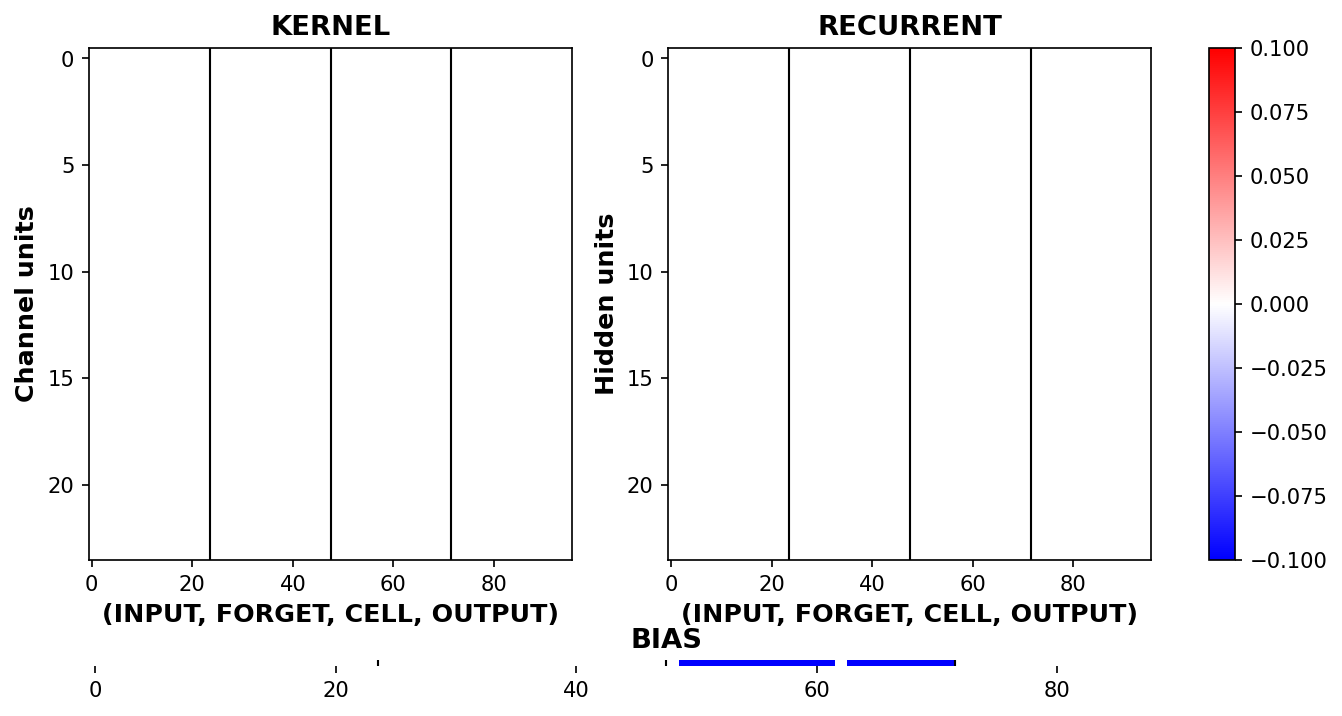

In [7]:
_ = rnn_histogram(tg.model, 1)
_ = rnn_heatmap(tg.model, 1)
_ = rnn_histogram(tg.model, 2)
_ = rnn_heatmap(tg.model, 2)